In [2]:
import librosa

y, sr = librosa.load("SpeechRec.wav")

In [3]:
print(y)
print(sr)

[0.         0.         0.         ... 0.02295396 0.021336   0.01874966]
22050


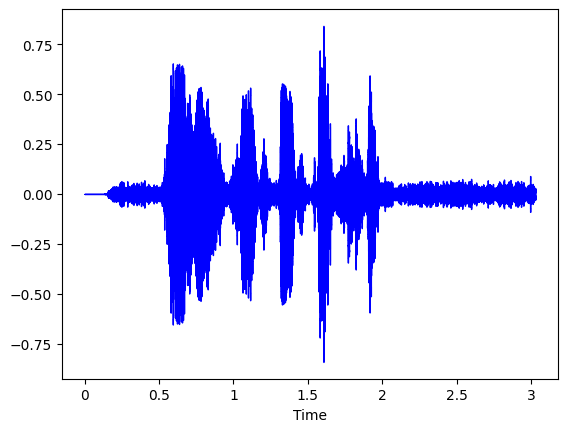

In [5]:
librosa.display.waveshow(y,color = 'blue')

In [8]:
from IPython.display import Audio
Audio(data=y, rate=sr)

In [9]:
import numpy as np

First_derivative = np.zeros(len(y))
First_derivative[0]=y[0]
for i in range (1,len(y)):
    First_derivative[i]=y[i]-y[i-1]
print(First_derivative)

[ 0.          0.          0.         ... -0.00173059 -0.00161796
 -0.00258634]


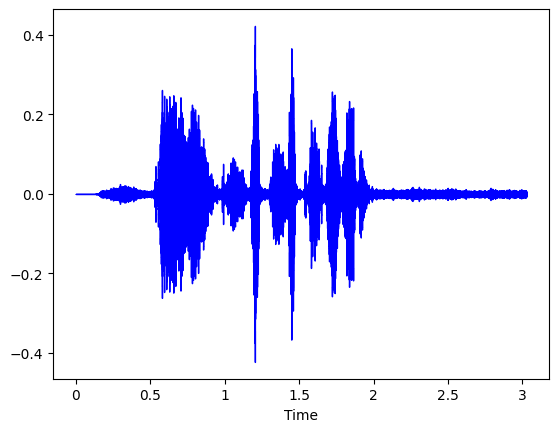

In [10]:
librosa.display.waveshow(First_derivative,color = 'blue')

In [11]:
Audio(data=First_derivative, rate=sr)

In [13]:
import numpy as np
zero_cros=librosa.zero_crossings(First_derivative, pad=False)
crossing_indices = np.where(zero_cros)[0]
crossing_intervals = np.diff(crossing_indices) / sr
 
 
speech_threshold = 0.1 
speech_intervals = crossing_intervals[crossing_intervals > speech_threshold]
silence_intervals = crossing_intervals[crossing_intervals <= speech_threshold]
 
avg_speech_length = np.mean(speech_intervals)
avg_silence_length = np.mean(silence_intervals)
 
print(f'Average Length between Consecutive Zero Crossings (Speech): {avg_speech_length:.4f} seconds')
print(f'Average Length between Consecutive Zero Crossings (Silence): {avg_silence_length:.4f} seconds')

Average Length between Consecutive Zero Crossings (Speech): nan seconds
Average Length between Consecutive Zero Crossings (Silence): 0.0002 seconds


c:\Users\bnsuk\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\bnsuk\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [17]:
zero_crossing_points = np.zeros(len(y))
for i in range(1,len(y)):
    if(y[i-1] == 0 and y[i] == 0):
        continue
    if(y[i-1]*y[i] <= 0):
        zero_crossing_points[i] = 1
num_zeros = []
first_one = False
count_zeros = 0
for i in range(len(y)):
    if(zero_crossing_points[i] == 0):
        count_zeros += 1
    else:
        num_zeros.append(count_zeros)
        count_zeros = 0
print(num_zeros)



[2945, 8, 0, 2, 0, 1, 0, 1, 2, 0, 6, 1, 1, 0, 3, 0, 0, 2, 2, 4, 0, 5, 1, 1, 0, 0, 3, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 8, 0, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 26, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 3, 0, 0, 0, 0, 4, 0, 107, 18,

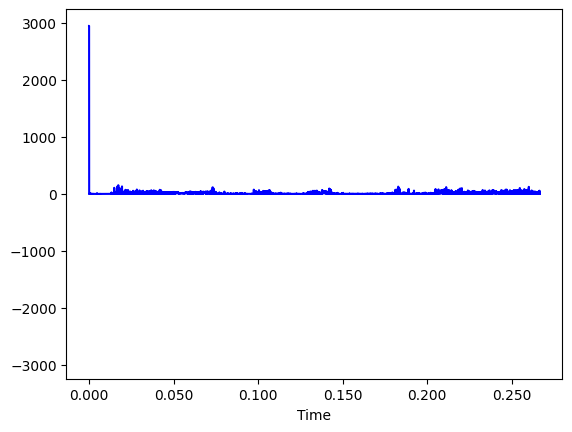

In [22]:
import librosa.display

x = np.zeros(len(num_zeros))
for i in range(len(num_zeros)):
    x[i] = float(num_zeros[i])
librosa.display.waveshow(x,color = "blue")

In [19]:
silence = num_zeros[0]/1
speech = sum(num_zeros[1:])/(len(num_zeros)-1)
print("average length (number of zeros in between) silence : ",silence)
print("avg length speech : ",speech)

average length (number of zeros in between) silence :  2945.0
avg length speech :  9.839537650858405


In [23]:
y1,sr = librosa.load("speech2.wav")

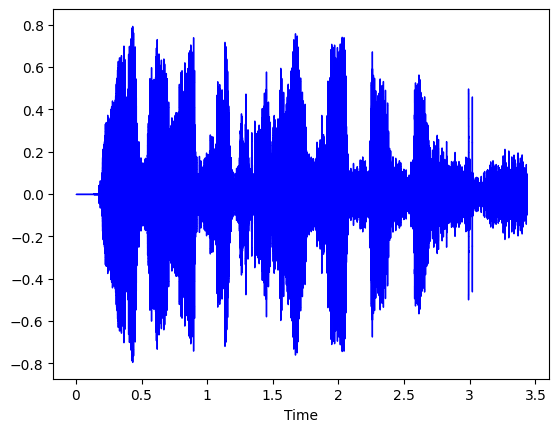

In [25]:

librosa.display.waveshow(y1,color = 'blue')

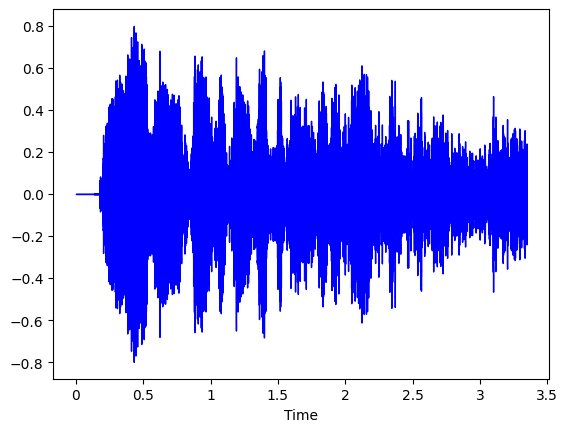

In [31]:
y2,sr = librosa.load("speech2_1.wav")
librosa.display.waveshow(y2,color = 'blue')